In [9]:
import pandas as pd
import numpy as np
import missingno as msngo
import matplotlib.pyplot as plt
plt.style.use("seaborn")
from preproc_nyc_sqf import create_suitable_dataframe, create_suitable_dataframe_with_nan

In [10]:
df = pd.read_csv("2009_1perc.csv").drop(columns=["Unnamed: 0"])
df.head()

,year,pct,ser_num,datestop,timestop,recstat,inout,trhsloc,perobs,crimsusp,...,zip,addrpct,sector,beat,post,xcoord,ycoord,dettypcm,linecm,detailcm
0,2009,41,1779,4032009,130,A,O,P,1.0,CPW,...,,41,G,7,,1013067,0238633,CM,1,20
1,2009,108,5805,10292009,1050,A,O,P,3.0,BURG,...,,108,J,,,1012043,0212157,CM,1,14
2,2009,43,8340,10062009,1450,1,O,P,1.0,MISD,...,,43,E,,,1017599,0240200,CM,1,20
3,2009,77,932,1232009,1843,A,O,P,5.0,MIS,...,,77,J,4,35,1002625,0183442,CM,1,24
4,2009,110,11224,12132009,1655,A,O,P,3.0,CPW,...,,110,H,,,1024535,0209890,CM,1,20


In [3]:
df_proc, categoricas, numericas = create_suitable_dataframe(df)
df_proc.head()

['perobs']


,recstat,inout,trhsloc,typeofid,explnstp,othpers,arstmade,sumissue,offunif,officrid,...,race,haircolr,eyecolor,build,city,sector,beat,post,month,meters
0,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,M,BRONX,G,7,,4,1.798320
2,1,O,P,V,Y,N,N,N,N,N,...,Q,BR,BR,M,BRONX,E,U,,10,1.920240
3,A,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,J,4,35,12,1.676400
5,1,I,T,V,Y,N,N,N,N,Y,...,B,BK,BR,M,MANHATTAN,F,16,,5,1.767840
6,1,O,P,P,Y,N,N,N,Y,N,...,B,BK,BR,T,BROOKLYN,N,U,,11,1.557528


In [4]:
# Vector objetivo 1
df_proc["arstmade"].value_counts()

N    4355
Y     281
Name: arstmade, dtype: int64

In [5]:
# Vector objetivo 2
violencia = df_proc.loc[:, "pf_hands":"pf_other"]
violencia.head()

,pf_hands,pf_wall,pf_grnd,pf_drwep,pf_ptwep,pf_baton,pf_hcuff,pf_pepsp,pf_other
0,N,N,N,N,N,N,N,N,N
2,N,N,N,N,N,N,N,N,N
3,N,N,N,N,N,N,N,N,N
5,N,N,N,N,N,N,N,N,N
6,N,N,N,N,N,N,N,N,N


In [6]:
for c in violencia.columns:
    print(violencia[c].unique())

['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']
['N' 'Y']


**Recuerdo de la sesión 3 de fundamentos**

```python
# Se hace una lista con todos los eventos posibles
eventos = [
    df_got["attacker_king"] == r
    for r in reyes_fillna
]

# Se hace una selección donde ocurra la unión de cada evento; Esto se hace con el el método logical_or de numpy
union_eventos = df_got[np.logical_or.reduce(eventos)]
```

In [11]:
# Opción para crear

condiciones = [
    df_proc[v] == "Y"
    for v in violencia.columns
]

df_proc["has_violence"] = np.where(np.logical_or.reduce(condiciones), "Y", "N")
df_proc["has_violence"].value_counts()

N    3500
Y    1136
Name: has_violence, dtype: int64

In [22]:
np.multiply(2, 3)

np.multiply.reduce([2, 3, 6])

36

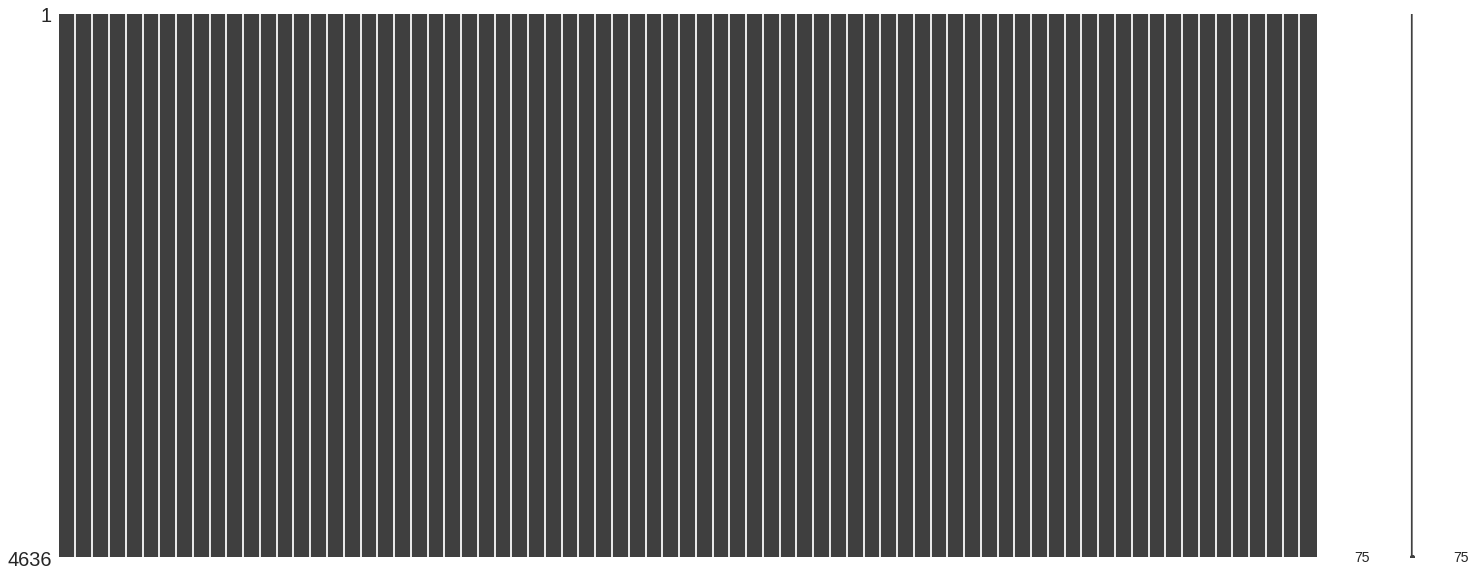

In [20]:
# Datos perdidos todas las columnas
msngo.matrix(df_proc);

In [12]:
df_proc, categoricas, numericas = create_suitable_dataframe_with_nan(df)
df_proc.head()

ValueError: list.remove(x): x not in list

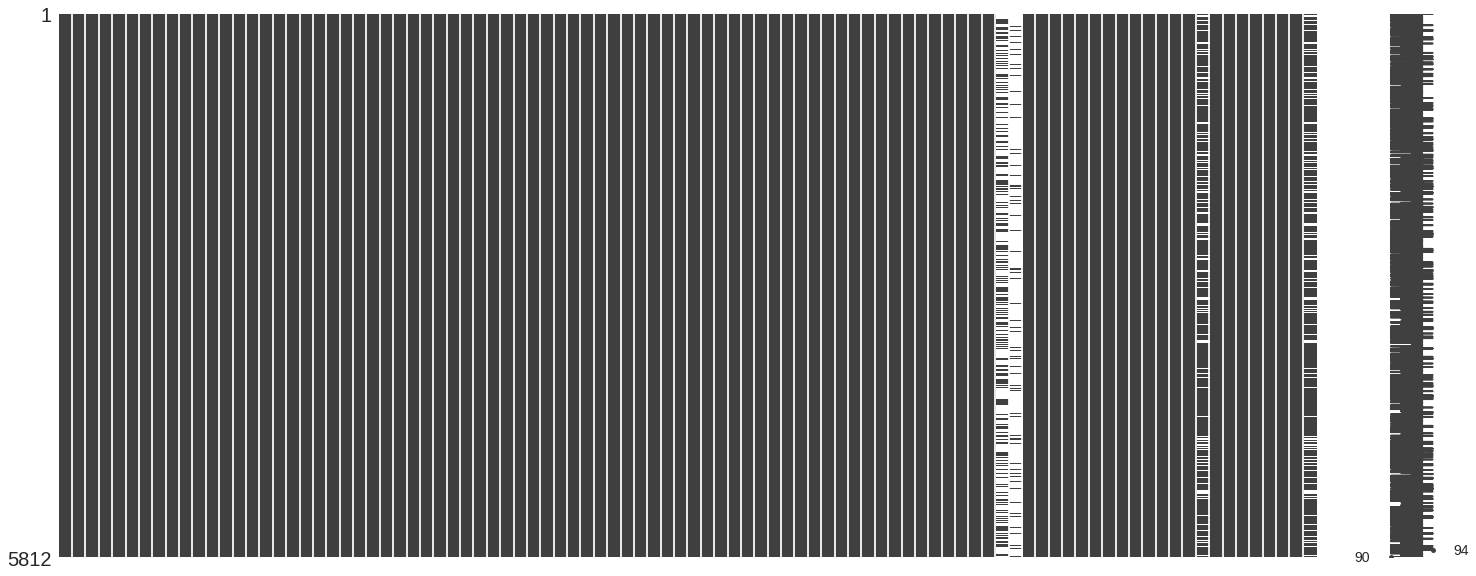

In [22]:
# Datos perdidos todas las columnas
msngo.matrix(df_proc);

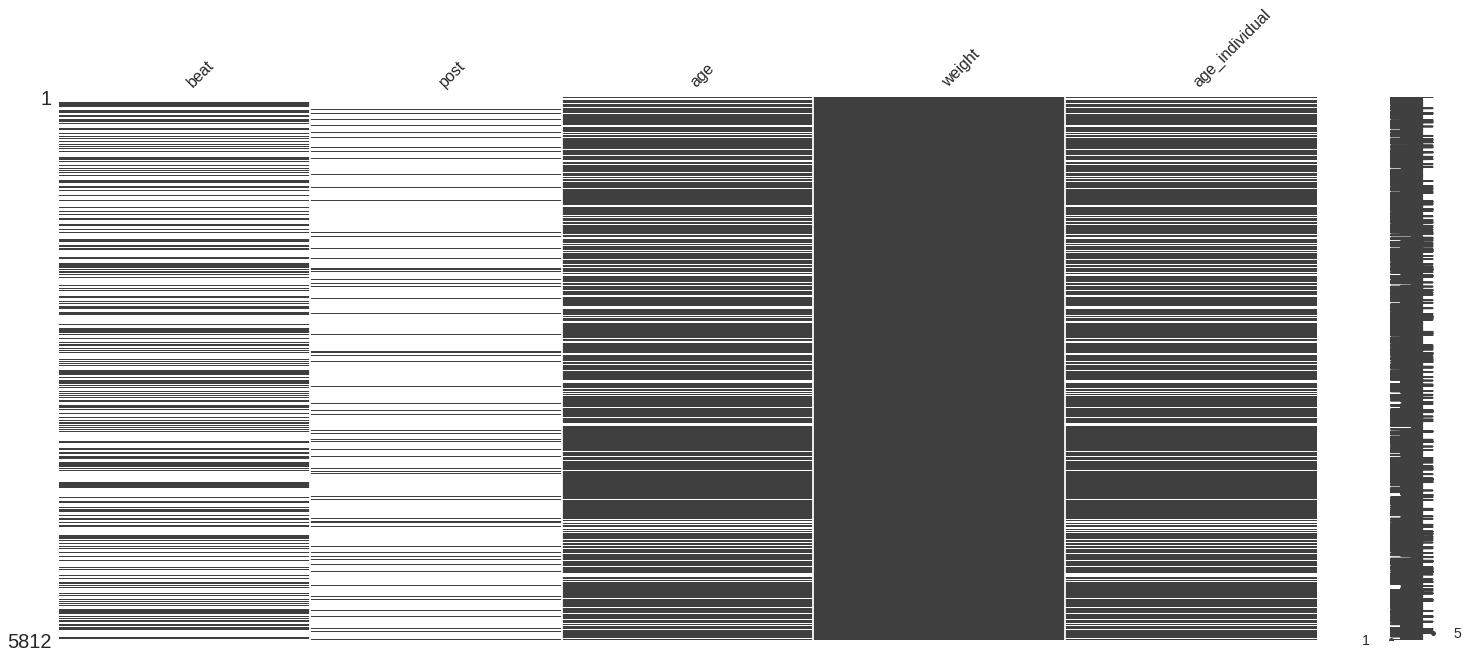

In [23]:
msngo.matrix(df_proc.loc[:, df_proc.isnull().any()]);

In [26]:
df_proc.loc[:, df_proc.isnull().any()].isna().sum()

beat              3622
post              5268
age               1176
weight               7
age_individual    1176
dtype: int64

In [27]:
df_proc.shape, df_proc.dropna().shape

((5812, 94), (200, 94))